# Palmer Penguins dataset
## kedro_example

### Loading your data

1. If you are using `kedro jupyter notebook` and the top right side of the screen matches the bname of your root folder, in this case, palmer_penguins, the data catalog and context can be accesed directly.

In [2]:
# this snippet will ognore all the error outputs on the notebook
import warnings
warnings.filterwarnings('ignore')

In [3]:
# contains info about the current project
context

In [4]:
# returns the list of all pipelines and nodes available on your context
context.pipelines

{'de': Pipeline([
 Node(split_data, ['size_penguins', 'params:example_test_data_ratio'], {'train_x': 'example_train_x', 'train_y': 'example_train_y', 'test_x': 'example_test_x', 'test_y': 'example_test_y'}, None),
 Node(make_scatter_plot, 'size_penguins', 'penguins_scatter_plot', None)
 ]),
 'ds': Pipeline([
 Node(train_model, ['example_train_x', 'example_train_y', 'parameters'], 'example_model', None),
 Node(predict, {'model': 'example_model', 'test_x': 'example_test_x'}, 'example_predictions', None),
 Node(report_accuracy, ['example_predictions', 'example_test_y'], None, None)
 ]),
 '__default__': Pipeline([
 Node(split_data, ['size_penguins', 'params:example_test_data_ratio'], {'train_x': 'example_train_x', 'train_y': 'example_train_y', 'test_x': 'example_test_x', 'test_y': 'example_test_y'}, None),
 Node(make_scatter_plot, 'size_penguins', 'penguins_scatter_plot', None),
 Node(train_model, ['example_train_x', 'example_train_y', 'parameters'], 'example_model', None),
 Node(predict, 

In [5]:
#(a.k.a data connector) contains the datasets for the projecs
catalog

For details on kedro context and data catalog go here [add links].

In [6]:
# lists all the data catalogues available
catalog.list()

['size_penguins',
 'penguins_scatter_plot',
 'iter_penguins',
 'parameters',
 'params:example_test_data_ratio',
 'params:example_num_train_iter',
 'params:example_learning_rate']

2. If your are using a <b>regular jupyter</b> notebook the code snipped bellow will acces the data context and catalog from your Kedro project.

In [7]:
# #only run if NOT USING `kedro jupyter notebook`
# from kedro.context import load_context
# #loads the context and catalog from the kedro project
# context = load_context('../')
# catalog = context.catalog

### The dataframe

In [8]:
#loads the data catalog
df = catalog.load('size_penguins')

2020-09-02 13:04:42,963 - kedro.io.data_catalog - INFO - Loading data from `size_penguins` (CSVDataSet)...


In [9]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


### Understanding the data

In [10]:
f"The size_penguins dataset has {df.shape} <rows, columns>"

'The size_penguins dataset has (344, 7) <rows, columns>'

In [11]:
# prints a detailed summary of the dataset
df.describe(include='all')

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
count,344,344,342.000000,342.000000,342.000000,342.000000,334
unique,3,3,NaN,NaN,NaN,NaN,3
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,MALE
freq,152,168,NaN,NaN,NaN,NaN,168
mean,NaN,NaN,43.921930,17.151170,200.915205,4201.754386,NaN
std,NaN,NaN,5.459584,1.974793,14.061714,801.954536,NaN
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN
25%,NaN,NaN,39.225000,15.600000,190.000000,3550.000000,NaN
50%,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN
75%,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN


### Data Analysis

"Covariance indicates the direction of the linear relationship between variables." ([source](https://towardsdatascience.com/let-us-understand-the-correlation-matrix-and-covariance-matrix-d42e6b643c22#78e7))

In [12]:
print('Covariance:')
df.cov()

Covariance:


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,29.807054,-2.534234,50.375765,2605.591912
culmen_depth_mm,-2.534234,3.899808,-16.212950,-747.370093
flipper_length_mm,50.375765,-16.212950,197.731792,9824.416062
body_mass_g,2605.591912,-747.370093,9824.416062,643131.077327


"Correlation measures both the strength and direction of the linear relationship between two variables." ([source](https://towardsdatascience.com/let-us-understand-the-correlation-matrix-and-covariance-matrix-d42e6b643c22#78e7))

In [13]:
print('Correlation:')
df.corr()

Correlation:


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,1.000000,-0.235053,0.656181,0.595110
culmen_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


Show all the columns with missing values:

In [14]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

### Simple data visualisation

In [15]:
print('Number of samples per species:')
df['species'].value_counts()

Number of samples per species:


Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

#### Barplot

In [16]:
# barplot > find out how ;)
# df['species'].value_counts().pyplot(kind='bar')

#### Scatter plot

Shows the correlation with relation to other features. It helps to find out important features that account for the classification model.

In [17]:
import matplotlib.pyplot as plt

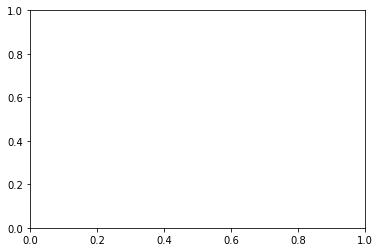

In [18]:
fig, ax = plt.subplots()

In [19]:
df.species.unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

Scatter plot with Penguin's species

In [20]:
df[df["species"] == "Adelie"].plot.scatter(x="culmen_length_mm", y="culmen_depth_mm", label="Adelie", color="magenta", ax=ax)

<AxesSubplot:xlabel='culmen_length_mm', ylabel='culmen_depth_mm'>

In [21]:
df[df["species"] == "Chinstrap"].plot.scatter(x="culmen_length_mm", y="culmen_depth_mm", label="Chinstrap", color="blue", ax=ax)

<AxesSubplot:xlabel='culmen_length_mm', ylabel='culmen_depth_mm'>

In [22]:
df[df["species"] == "Gentoo"].plot.scatter(x="culmen_length_mm", y="culmen_depth_mm", label="Gentoo", color="green", ax=ax)

<AxesSubplot:xlabel='culmen_length_mm', ylabel='culmen_depth_mm'>

In [23]:
fig.set_size_inches(15,15)

In [24]:
# not necessary when translating to kedro
fig.savefig("scatter_plot_species")

#### Heat Map

HeatMap showing correlation between flipper_length_mm & body_mass_g (since longer the flipper, bigger the bird)

Footnote:  
For more information on how to use IPython and Jupyter notebooks/Labs with Kedro follow this [link](https://kedro.readthedocs.io/en/stable/10_tools_integration/02_ipython.html "Kedro docs").